In [1]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt

In [2]:
def plot_arrows_6dof(points_xyz_and_angles, colors=None):
    # Create a 3D plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection="3d")

    # Extract individual components from the points_xyz_and_angles
    points_xyz_and_angles = np.array(points_xyz_and_angles)
    xyz_coordinates = points_xyz_and_angles[:, :3]  # Extract XYZ coordinates
    x, y, z = xyz_coordinates[:,
                              0], xyz_coordinates[:, 1], xyz_coordinates[:, 2]

    # Arrow length (you can adjust this based on your needs)
    arrow_length = 30

    for i, point in enumerate(points_xyz_and_angles):
        x_i, y_i, z_i, yaw, pitch, roll = point
        yaw_rad, pitch_rad, roll_rad = (
            np.radians(yaw),
            np.radians(pitch),
            np.radians(roll),
        )

        # Compute the arrow components in the X, Y, and Z directions
        dx = arrow_length * np.cos(pitch_rad) * np.cos(yaw_rad)
        dy = arrow_length * np.cos(pitch_rad) * np.sin(yaw_rad)
        dz = arrow_length * np.sin(pitch_rad)

        color = colors[i] if colors is not None else "b"

        # Plot the arrow with the specified color
        ax.quiver(x_i, y_i, z_i, dx, dy, dz,
                  color=color, arrow_length_ratio=0.2)

    # Set labels for each axis
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")

    # Adjust the plot limits (you can adjust this based on your data range)
    min_x = min(x)
    max_x = max(x)
    min_y = min(y)
    max_y = max(y)
    min_z = min(z)
    max_z = max(z)

    ax.set_xlim([min_x - arrow_length, max_x + arrow_length])
    ax.set_ylim([min_y - arrow_length, max_y + arrow_length])
    ax.set_zlim([min_z - arrow_length, max_z + arrow_length])

    plt.show()


# # Example input in the format [[x1, y1, z1, yaw1, pitch1, roll1], [x2, y2, z2, yaw2, pitch2, roll2], ...]
# points_xyz_and_angles = [[100, 100, 100, 30, 45, 60],
#                          [100, 400, 100, 45, 60, 90],
#                          [400, 100, 100, 60, 90, 120],
#                          [400, 400, 100, 90, 120, 150],
#                          [250, 400, 100, 120, 150, 180]]

# custom_colors = ['red', 'green', 'blue', 'purple', 'orange']

# # Call the plot_arrows_6dof function to visualize 6-DOF points as arrows with custom colors
# plot_arrows_6dof(points_xyz_and_angles, colors=custom_colors)

In [3]:
import numpy as np
import matplotlib.pyplot as plt


def plot_points_3dof(xyz_coordinates, colors=None):
    # Convert xyz_coordinates to numpy array
    xyz_coordinates = np.array(xyz_coordinates)

    # Create a 3D plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection="3d")

    # # Set custom colors if provided
    if colors is not None:
        ax.scatter(
            xyz_coordinates[:, 0],
            xyz_coordinates[:, 1],
            xyz_coordinates[:, 2],
            c=colors,
            marker="o",
        )
    else:
        # Plot the points with default color 'b' if custom colors are not provided
        ax.scatter(
            xyz_coordinates[:, 0],
            xyz_coordinates[:, 1],
            xyz_coordinates[:, 2],
            c="b",
            marker="o",
        )

    # Set labels for each axis
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")

    # Show the plot
    plt.show()


# # Example XYZ coordinates and custom colors
# Scene1 = [[100, 100, 100],
#           [100, 400, 100],
#           [400, 100, 100],
#           [400, 400, 100],
#           [250, 400, 100]]


custom_colors = ["red", "green", "blue", "purple", "orange"]

# # Call the function to visualize the points with custom colors
# plot_points_3dof(Scene1, colors=custom_colors)

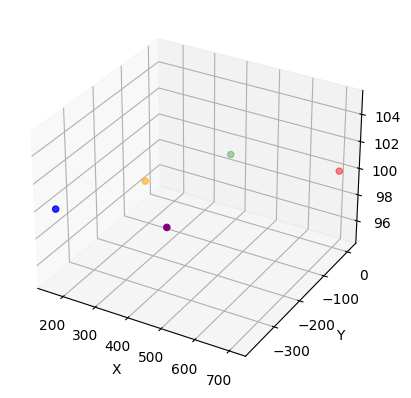

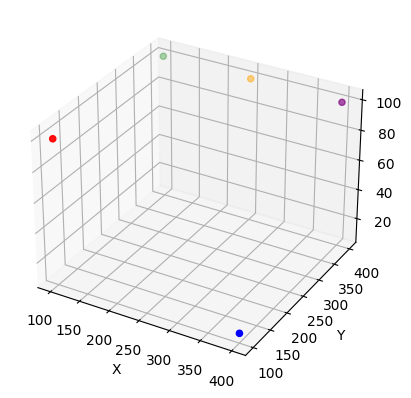

In [4]:
Scene1 = [
    [100, 100, 100],
    [100, 400, 100],
    [400, 100, 10],
    [400, 400, 100],
    [250, 400, 100],
]
Scene2 = [
    [100, 700, 100],
    [100, 400, 100],
    [400, 100, 100],
    [400, 400, 100],
    [250, 250, 100],
]

Scene3 = []

R = np.asarray(
    [[math.cos(30), -math.sin(30), 0], [math.sin(30), math.cos(30), 0], [0, 0, 1]]
)

for i in range(len(Scene2)):
    S = R @ np.asarray(Scene2[i]).T
    Scene3.append(S)

Scene2 = Scene3
plot_points_3dof(Scene2, colors=custom_colors)
plot_points_3dof(Scene1, colors=custom_colors)

In [5]:
def GetEdgeProb(x1, x2):
    return np.exp(-np.abs(x1 - x2))

In [6]:
# import numpy as np
# import open3d as o3d

# def visualize_arrows_6dof(points_xyz_and_angles, colors=None):
#     # Create a PointCloud object
#     point_cloud = o3d.geometry.PointCloud()

#     # Extract individual components from the points_xyz_and_angles
#     points_xyz_and_angles = np.array(points_xyz_and_angles)
#     xyz_coordinates = points_xyz_and_angles[:, :3]  # Extract XYZ coordinates

#     # Set the point cloud data
#     point_cloud.points = o3d.utility.Vector3dVector(xyz_coordinates)

#     if colors is not None:
#         # Convert custom colors to open3d.utility.Vector3dVector format
#         custom_colors = [color[:3] for color in colors]
#         point_cloud.colors = o3d.utility.Vector3dVector(custom_colors)

#     # Create a mesh for each arrow
#     arrow_meshes = []
#     for i, point in enumerate(points_xyz_and_angles):
#         x, y, z, yaw, pitch, roll = point
#         arrow = o3d.geometry.TriangleMesh.create_arrow(cylinder_radius=0.5*3, cone_radius=1.0*3, cylinder_height=3.0*3, cone_height=5.0*3)
#         rotation_matrix = o3d.geometry.get_rotation_matrix_from_xyz(np.radians([roll, pitch, yaw]))
#         arrow.rotate(rotation_matrix, center=[0, 0, 0])
#         arrow.translate(np.array([x, y, z]))  # Translation

#         if colors is not None:
#             # Assign custom color to the vertices of the arrow mesh
#             arrow_vertex_colors = np.tile(custom_colors[i], (len(arrow.vertices), 1))
#             arrow.vertex_colors = o3d.utility.Vector3dVector(arrow_vertex_colors)

#         arrow_meshes.append(arrow)

#     # Create arrows for the origin
#     arrow_x = o3d.geometry.TriangleMesh.create_arrow(cylinder_radius=0.5, cone_radius=1.0, cylinder_height=3.0, cone_height=5.0)
#     arrow_y = o3d.geometry.TriangleMesh.create_arrow(cylinder_radius=0.5, cone_radius=1.0, cylinder_height=3.0, cone_height=5.0)
#     arrow_z = o3d.geometry.TriangleMesh.create_arrow(cylinder_radius=0.5, cone_radius=1.0, cylinder_height=3.0, cone_height=5.0)

#     # Rotate the arrows to align with the XYZ axes
#     rotation_matrix_x = o3d.geometry.get_rotation_matrix_from_xyz([0, 0, 0])
#     rotation_matrix_y = o3d.geometry.get_rotation_matrix_from_xyz([0, 0, np.radians(-90)])
#     rotation_matrix_z = o3d.geometry.get_rotation_matrix_from_xyz([0, np.radians(90), 0])
#     arrow_x.rotate(rotation_matrix_x, center=[0, 0, 0])
#     arrow_y.rotate(rotation_matrix_y, center=[0, 0, 0])
#     arrow_z.rotate(rotation_matrix_z, center=[0, 0, 0])

#     # Visualize the point cloud and arrows
#     o3d.visualization.draw_geometries([point_cloud] + arrow_meshes + [arrow_x, arrow_y, arrow_z])

# # Example input in the format [[x1, y1, z1, yaw1, pitch1, roll1], [x2, y2, z2, yaw2, pitch2, roll2], ...]
# points_xyz_and_angles = [[100, 100, 100, 30, 45, 60],
#                          [100, 400, 100, 45, 60, 90],
#                          [400, 100, 100, 60, 90, 120],
#                          [400, 400, 100, 90, 120, 150],
#                          [250, 400, 100, 120, 150, 180]]

# custom_colors = [[1, 0, 0],  # Red
#                  [0, 1, 0],  # Green
#                  [0, 0, 1],  # Blue
#                  [1, 0, 1],  # Purple
#                  [1, 0.5, 0]]  # Orange

# # Call the visualize_arrows_6dof function to visualize 6-DOF points as arrows with custom colors and origin arrows
# visualize_arrows_6dof(points_xyz_and_angles, colors=custom_colors)

In [7]:
def GetAllEdgeProb():
    Edgeprob = {}
    for i in range(len(Scene1)):
        for j in range(len(Scene2)):
            index = (i, j)
            Dist1 = np.linalg.norm(np.asarray(
                Scene1[i]) - np.asarray(Scene1[j]))
            Dist2 = np.linalg.norm(np.asarray(
                Scene2[i]) - np.asarray(Scene2[j]))

            Edgeprob[index] = GetEdgeProb(Dist1, Dist2)

    return Edgeprob

In [8]:
E_Prob = GetAllEdgeProb()
print(E_Prob)

{(0, 0): 1.0, (0, 1): 0.9999999999999432, (0, 2): 4.913942262567314e-156, (0, 3): 0.9999999999999432, (0, 4): 4.6008371328886736e-61, (1, 0): 0.9999999999999432, (1, 1): 1.0, (1, 2): 7.940889787283238e-05, (1, 3): 1.0, (1, 4): 1.038485243581605e-27, (2, 0): 4.913942262567314e-156, (2, 1): 7.940889787283238e-05, (2, 2): 1.0, (2, 3): 1.8336624225081058e-06, (2, 4): 2.0328683151856616e-59, (3, 0): 0.9999999999999432, (3, 1): 1.0, (3, 2): 1.8336624225081058e-06, (3, 3): 1.0, (3, 4): 1.038485243581605e-27, (4, 0): 4.6008371328886736e-61, (4, 1): 1.038485243581605e-27, (4, 2): 2.0328683151856616e-59, (4, 3): 1.038485243581605e-27, (4, 4): 1.0}


In [9]:
Node_Prob_Init = [1, 0.5, 0.5, 0.5, 0.5]

In [10]:
for r in range(2000):
    for i in range(len(Scene1)):
        score = 0
        for j in range(len(Scene2)):
            edge = (i, j)
            edge_prob = E_Prob[edge]
            score += edge_prob * Node_Prob_Init[j]

        Node_Prob_Init[i] = 1 / (1 + np.exp(-score))

In [11]:
Node_Prob_Init

[0.9444520906358284,
 0.944454836235063,
 0.6590683066302926,
 0.9444521540369951,
 0.6590460684074066]

In [12]:
def UpdateNodeProb1(Node_Probablity, node_index):
    A = 1
    B = 1

    for i in range(len(Node_Probablity)):
        if i != node_index:
            A *= E_Prob[(i, node_index)]
            B *= Node_Probablity[i]

    NodeProb = A / B
    Node_Probablity[node_index] = NodeProb
    print(A, B)

    return Node_Probablity

In [13]:
def GetNormalization(Node_Probablity):
    NormalizationVal = 0

    for i in range(len(Scene1)):
        for j in range(len(Scene2)):
            if i != j:
                index = (i, j)
                Edge_Prob1 = E_Prob[(i, j)]
                A = Node_Probablity[i]

                NormalizationVal += Edge_Prob1 / A

    return NormalizationVal / 4

In [14]:
def UpdateNodeProb2(Node_Probablity, node_index):
    A = 1
    B = 1
    Total = 0
    for i in range(len(Node_Probablity)):
        if i != node_index:
            A = E_Prob[(i, node_index)]
            B = Node_Probablity[i]

            Total += A / B

    NodeProb = Total / GetNormalization(Node_Probablity)
    #     print(GetNormalization( Node_Probablity ) )
    Node_Probablity[node_index] = NodeProb / 2

    return Node_Probablity

In [15]:
NumIters = 100
Node_Probablity = Node_Prob_Init
for iters in range(NumIters):
    for i in range(len(Node_Probablity)):
        Node_Probablity = UpdateNodeProb2(Node_Probablity, i)

In [16]:
print(Node_Probablity)

[1.0226841568659349e-22, 1.3832262055276319, 1.9966653869024512e-27, 0.4975416030370482, 7.340518750186978e-50]
